###Исходные данные
<ul>
    <li>Техническое задание на выполнение: 'Задание_Sber.html'</li>
    <li>Файл формата csv: "data.csv"</li>
###Используемый стек технологий:
`Jupyter notebook,
Python3.9:
pandas,
numpy,
matplotlib,
scipy,
...другие сторонние библиотеки.`

#  Имеется выгрузка с ежедневной конверсией сайта. Необходимо написать код на Python с помощью которого можно осуществить следующие действия:

## <font color='red'> Прочитать данные (data.csv) </font>
[Результат - Объект pandas.DataFrame](#division_ID_1)

<a id = "division_ID_3"text goes here></a>

In [109]:
# импортируем необходимые библиотеки
import sys
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import csv
from termcolor import colored

# Предварительная обработка данных: "битые" строки, не правильные разделители, отсутствие значений.
with (open('data.csv', mode='r') as file, 
      open('data_out.csv', 'w') as outFile):
    csvFile = csv.reader(file, delimiter='\t')
    csvOutFile = csv.writer(outFile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    header = next(csvFile)
    csvOutFile.writerow(header)
    for lines in csvFile:
        for val in lines:
            if val != '':
                lines = [str(i).replace(',','.') for i in lines]
            else:
                lines = ['NaN']
        csvOutFile.writerow(lines)

<a id = "division_ID_1"text goes here></a>

In [110]:
# получаем данные в формате типа pandas.DataFrame из файла data_out.csv
data_set = pd.read_csv(
    'data_out.csv',
    sep=',',
    dtype={'Visits':int, 'Sales':int, 'Conversions': int}, parse_dates=['Date']
)
data_set

,Date,Visits,Conversions,Sales
0,2020-04-01,1732,242,170
1,2020-04-02,1690,302,190
2,2020-04-03,1585,277,199
3,2020-04-04,1613,256,190
4,2020-04-05,1660,198,155
...,...,...,...,...
1131,2020-08-07,1042,276,216
1132,2020-08-08,939,278,211
1133,2020-08-09,860,233,190
1134,2020-08-10,911,273,210


## <font color='red'> Вывести описательную статистику </font> 
[Результат применения метода describe()](#division_ID_2)

In [111]:
# информация о полученном датафрейме
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1136 non-null   datetime64[ns]
 1   Visits       1136 non-null   int32         
 2   Conversions  1136 non-null   int32         
 3   Sales        1136 non-null   int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 22.3 KB


<a id = "division_ID_2"text goes here></a>

In [112]:
# описательная статистика
data_set.describe()

,Visits,Conversions,Sales
count,1136.000000,1136.000000,1136.000000
mean,1207.187500,256.922535,174.939261
std,423.249078,46.458652,36.383043
min,527.000000,128.000000,43.000000
25%,915.000000,224.000000,152.000000
50%,1112.000000,252.000000,176.500000
75%,1402.500000,285.000000,199.000000
max,3421.000000,417.000000,562.000000


##<font color='red'> Произвести необходимую обработку данных </font> 
[Обработка была проведена ранее](#division_ID_3)

In [113]:
# удаляем недостающие значения (если присутствуют), применяем метод сортировки sort_index() по дате 
data_set = data_set.dropna().sort_index(ascending=False)
# проверяем последние 10 результатов 
data_set.tail(10)


,Date,Visits,Conversions,Sales
9,2020-04-10,1145,295,212
8,2020-04-09,1225,241,170
7,2020-04-08,1513,249,164
6,2020-04-07,1590,341,179
5,2020-04-06,1795,257,180
4,2020-04-05,1660,198,155
3,2020-04-04,1613,256,190
2,2020-04-03,1585,277,199
1,2020-04-02,1690,302,190
0,2020-04-01,1732,242,170


In [114]:
# просмотрим наименования столбцов
col = data_set.columns
for i in col:
    print(i)

Date
Visits
Conversions
Sales


##<font color='red'> Построить линейную диаграмму (по всем полям, кроме поля Date)</font> 

<AxesSubplot:title={'center':'Linear Diagramm'}>

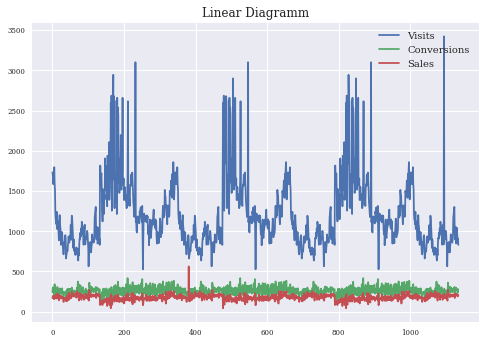

In [115]:
# предварительные настройки внешнего вида графиков
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
# графики
data_set.iloc[:,1:].plot(title = 'Linear Diagramm', grid=True, fontsize=7, legend=True)

##<font color='red'>Вывести диаграмму "Ящик с усами";</font>
####Формируем график для просмотра выбросов значений, для этих целей воспользуемся графиком следующего типа: Диаграмма размаха (англ.box-and-whiskers diagram or plot, box plot)— график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей. Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

<AxesSubplot:>

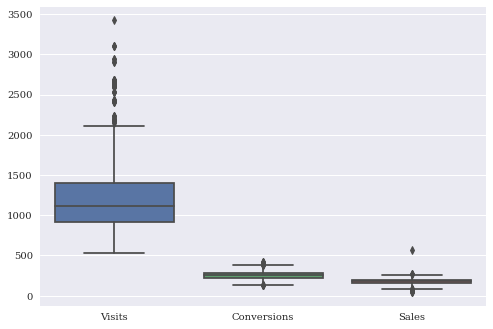

In [116]:
# Строим необходимую диаграмму, смотрим на выбросы
sns.boxplot(data=data_set)

##<font color='red'>Далее в случае наличия выбросов необходимо произвести следующие действия:</font>
<ul>
    <font color='red'><li>Произвести ампутацию аномальных значений и ошибок выгрузки;</li></font>
    <font color='red'><li>Произвести импутацию получившихся пропущенных значений.</li></font>

Для оценки выбросов посмотрим существенности различия средних значений двух выборок
значения 75% процентиля и максимального значения

In [117]:
data_set.describe()

,Visits,Conversions,Sales
count,1136.000000,1136.000000,1136.000000
mean,1207.187500,256.922535,174.939261
std,423.249078,46.458652,36.383043
min,527.000000,128.000000,43.000000
25%,915.000000,224.000000,152.000000
50%,1112.000000,252.000000,176.500000
75%,1402.500000,285.000000,199.000000
max,3421.000000,417.000000,562.000000


###Выбросы не существенны. Попробуем вычислить z-оценку каждого значения в выборке относительно среднего значения выборки и стандартного отклонения с помощью модуля stats.zscore:

In [118]:
# selection results
data_super=data_set[['Visits','Conversions', 'Sales']][(np.abs(stats.zscore(data_set[['Visits','Conversions', 'Sales']])) < 0.3).all(axis=1)].dropna()

###Посмотрим на результаты после исключения выбросов по данному методу и опять построим диаграмму:

,Visits,Conversions,Sales
count,22.000000,22.000000,22.000000
mean,1180.681818,253.681818,175.500000
std,74.901450,6.113111,5.738342
min,1081.000000,245.000000,168.000000
25%,1129.000000,250.000000,169.500000
50%,1178.000000,252.000000,176.000000
75%,1261.750000,258.000000,181.000000
max,1286.000000,265.000000,183.000000


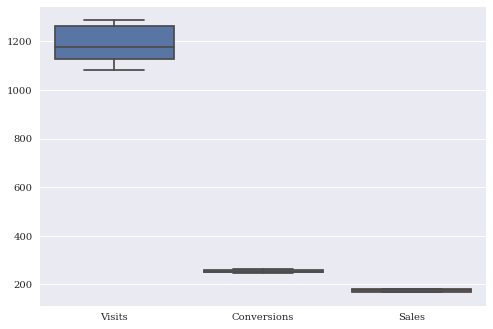

In [119]:
sns.boxplot(data=data_super)
data_super.describe()

In [120]:
data_super.describe()

,Visits,Conversions,Sales
count,22.000000,22.000000,22.000000
mean,1180.681818,253.681818,175.500000
std,74.901450,6.113111,5.738342
min,1081.000000,245.000000,168.000000
25%,1129.000000,250.000000,169.500000
50%,1178.000000,252.000000,176.000000
75%,1261.750000,258.000000,181.000000
max,1286.000000,265.000000,183.000000


### Выборка очень мала, работаем с прежними данными. Читаем датасет и используем поле "Дата" в качестве индекса.

In [121]:
data_set = pd.read_csv(
    'data_out.csv',
    sep=',',
    dtype={'Visits':int, 'Sales':int, 'Conversions': int},
    index_col = 0,
    parse_dates=['Date']
)
data_set

,Visits,Conversions,Sales
Date,,,
2020-04-01,1732,242,170
2020-04-02,1690,302,190
2020-04-03,1585,277,199
2020-04-04,1613,256,190
2020-04-05,1660,198,155
...,...,...,...
2020-08-07,1042,276,216
2020-08-08,939,278,211
2020-08-09,860,233,190


##<font color='red'>Рассчитать долю клиентов, которые после визита добавили товар в корзину (Поле - Conversion).</font>

In [122]:
data_set['Share_add'] = (data_set.Conversions/data_set.Visits)*100

In [123]:
data_set

,Visits,Conversions,Sales,Share_add
Date,,,,
2020-04-01,1732,242,170,13.972286
2020-04-02,1690,302,190,17.869822
2020-04-03,1585,277,199,17.476341
2020-04-04,1613,256,190,15.871048
2020-04-05,1660,198,155,11.927711
...,...,...,...,...
2020-08-07,1042,276,216,26.487524
2020-08-08,939,278,211,29.605964
2020-08-09,860,233,190,27.093023


##<font color='red'>Рассчитать долю клиентов, которые после визита купили товар (Поле - Sales).</font>

In [124]:
data_set['Share_buy'] = (data_set.Sales/data_set.Visits)*100
data_set

,Visits,Conversions,Sales,Share_add,Share_buy
Date,,,,,
2020-04-01,1732,242,170,13.972286,9.815242
2020-04-02,1690,302,190,17.869822,11.242604
2020-04-03,1585,277,199,17.476341,12.555205
2020-04-04,1613,256,190,15.871048,11.779293
2020-04-05,1660,198,155,11.927711,9.337349
...,...,...,...,...,...
2020-08-07,1042,276,216,26.487524,20.729367
2020-08-08,939,278,211,29.605964,22.470714
2020-08-09,860,233,190,27.093023,22.093023


##<font color='red'>Повторно вывести описательную статистику</font>

In [125]:
data_set.describe()

,Visits,Conversions,Sales,Share_add,Share_buy
count,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000
mean,1207.187500,256.922535,174.939261,23.294091,16.129996
std,423.249078,46.458652,36.383043,7.389237,6.072917
min,527.000000,128.000000,43.000000,7.453961,1.657672
25%,915.000000,224.000000,152.000000,17.937775,11.726403
50%,1112.000000,252.000000,176.500000,23.286052,16.148532
75%,1402.500000,285.000000,199.000000,28.442211,20.080321
max,3421.000000,417.000000,562.000000,54.202899,62.236988


##<font color='red'>Построить линейную диаграмму (по всем полям, кроме поля Date).</font>

<AxesSubplot:title={'center':'Graphics'}>

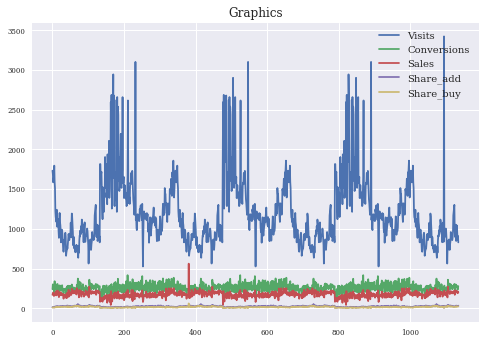

In [126]:
data_set = data_set.reset_index()
# графики
data_set.iloc[:,1:].plot(title = 'Graphics', grid=True, fontsize=7, legend=True)

##<font color='red'>Сгруппировать данные по месяцу и вывести долю клиентов, которые после визита купили товар построить линейную диаграмму (В таблицу добавить поле всего).</font>
[Результат groupby()](#division_ID_4)

In [127]:
data_set['Date'] = pd.to_datetime(data_set.Date).dt.month
data_set

,Date,Visits,Conversions,Sales,Share_add,Share_buy
0,4,1732,242,170,13.972286,9.815242
1,4,1690,302,190,17.869822,11.242604
2,4,1585,277,199,17.476341,12.555205
3,4,1613,256,190,15.871048,11.779293
4,4,1660,198,155,11.927711,9.337349
...,...,...,...,...,...,...
1131,8,1042,276,216,26.487524,20.729367
1132,8,939,278,211,29.605964,22.470714
1133,8,860,233,190,27.093023,22.093023
1134,8,911,273,210,29.967069,23.051592


In [128]:
df_1 = data_set.iloc[:,:4].groupby(['Date']).sum()
df_1.index.names = ['NumberMonth']

<a id = "division_ID_4"text goes here></a>

In [129]:
df_1['In_all'] = (data_set.Sales/data_set.Visits)*100
df_1


,Visits,Conversions,Sales,In_all
NumberMonth,,,,
1,99999,24231,15024,11.242604
2,90753,22563,14751,12.555205
3,133743,26577,18381,11.779293
4,144348,30984,22024,9.337349
5,109612,29060,22061,10.027855
6,102697,31428,23359,11.257862
7,113221,32445,23935,10.839392
8,40952,11872,8888,13.877551
9,92211,12143,7239,18.515284


<AxesSubplot:title={'center':'Graphics'}, xlabel='NumberMonth'>

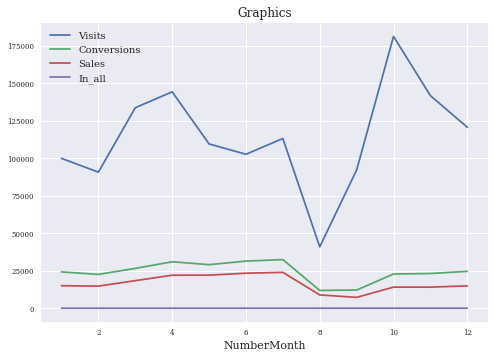

In [130]:
df_1.plot(title = 'Graphics', grid=True, fontsize=7, legend=True)

##<font color='red'>Подсветить красным цветом минимальный месяц по продажам и зеленым цветом максимальный.</font>

In [131]:

#print(colored(df_1.iloc[:6], "white"))
print(colored('МАКСИМАЛЬНЫЕ ЗНАЧЕНИЯ:', "green"))
print(colored(df_1[df_1['Sales'] == df_1['Sales'].max()], "green"))
#print(colored(df_1.iloc[7:8], "white"))
print(colored('МИНИМАЛЬНЫЕ ЗНАЧЕНИЯ:', "red"))
print(colored(df_1[df_1['Sales'] == df_1['Sales'].min()], "red"))
#print(colored(df_1.iloc[9:], "white"))


МАКСИМАЛЬНЫЕ ЗНАЧЕНИЯ:
             Visits  Conversions  Sales     In_all
NumberMonth                                       
7            113221        32445  23935  10.839392
МИНИМАЛЬНЫЕ ЗНАЧЕНИЯ:
             Visits  Conversions  Sales     In_all
NumberMonth                                       
9             92211        12143   7239  18.515284


##<font color='red'>Вывести таблицу и линейную диаграмму из пункта 1.11 в файл excel.</font>

In [132]:
data_set = pd.read_csv(
    'data_out.csv',
    sep=',',
    dtype={'Visits':int, 'Sales':int, 'Conversions': int},
    index_col = 0,
    parse_dates=['Date']
)
data_set
data_set.iloc[:,:3].to_excel('./results.xlsx')

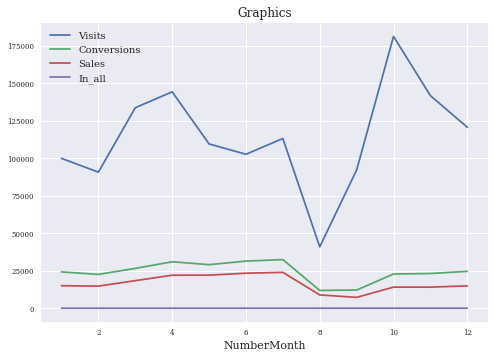

In [133]:
df_gr = df_1.plot(title = 'Graphics', grid=True, fontsize=7, legend=True).get_figure()
df_gr.savefig('graphic.png')

#РЕЗУЛЬТИРУЮЩИЕ ФАЙЛЫ
<ul>
    <li>answers.ipynb - файл Jupyter Notebook;</li>
    <li>data_out.csv - файл обработанных данных;</li>
    <li>results.xlsx - результат выгрузки;</li>
    <li>graphic.png - файл графика;</li>
    <li>Решение.html - файл с решением.</li>
    